# COVER TYPE ANALYSIS - Multi-Class Classification and Feature Selection Notebook + Decision Tree

SharpestMinds Project by Angela Teng with the mentorship of Jeremie Harris

**Completed:** 
- Loading data + importing libraries 
- Exploratory Data Analysis 

**To Do:**
- Data Cleaning 
- Feature Selection 
- Dimensionality Reduction 
- Modeling 
- Analysis 
- Polish 

## Importing Libraries + Loading Data

In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#import sklearn.cross_validation as cross_validation
#from sklearn.cross_validation import train_test_split
import sklearn.model_selection as model_selection
from sklearn import linear_model

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from sklearn.neighbors import KNeighborsClassifier

from random import sample

In [2]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [3]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [4]:
data = open("covtype.data")
data

<_io.TextIOWrapper name='covtype.data' mode='r' encoding='UTF-8'>

In [5]:
data = pd.read_csv("covtype.data", header=None)
#interesting that read csv also works on .data files! 

In [6]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [7]:
data.columns = cols
data.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

**Goal: predict cover type given the other variables (7 cover types )**

In [8]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Soil_Type_39       \
               75%     max     count        mean  ...          75%  max   
Cover_Type                                        ...                     
1           3235.0  3686.0  211840.0  156.138227  ...          0.0  1.0   
2           3042.0  3433.0  283301.0  152.060515  ...          0.0  1.0   
3           2549.0  2899.0   35754.0  176.372490  ...          0.0  0.0   
4           2304.0  2526.0    2747.0  137.139425  ...          0.0  0.0   
5           2857.0  3011.0    9493.0  139.283051  ...          0.0  0.0   
6           2544.0  2900.0   17367.0  180.539068  ...          0.0  0.0   
7           3409.0  3858.0   20510.0  153.236226  ...          1.0  1.0   

           Soil_Type_40                                               
                  count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                            
1              211840.0  0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2              283301.0  0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3               35754.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                2747.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5                9493.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6               17367.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7               20510.0  0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [9]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

1  2  3  4  5  6  7
0  0  0  0  0  1  0  0
1  0  0  0  0  1  0  0
2  0  1  0  0  0  0  0
3  0  1  0  0  0  0  0
4  0  0  0  0  1  0  0

In [10]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

1  2  3  4  5  6  7  elevation  aspect  slope  ...  Soil_Type_32  \
0  0  0  0  0  1  0  0       2596      51      3  ...             0   
1  0  0  0  0  1  0  0       2590      56      2  ...             0   
2  0  1  0  0  0  0  0       2804     139      9  ...             0   
3  0  1  0  0  0  0  0       2785     155     18  ...             0   
4  0  0  0  0  1  0  0       2595      45      2  ...             0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_38  Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0             0           5  
1             0             0             0           5  
2             0             0             0           2  
3             0             0             0           2  
4             0             0             0           5  

[5 rows x 62 columns]

In [11]:
#variable importance by correlation
cov_type_corr = data.corr()['Cover_Type'][:-1]

In [13]:
golden_features_list = cov_type_corr[abs(cov_type_corr) > 0.1].sort_values(ascending=False)
print("There are {} somewhat correlated values with Cover Type:\n{}".format(len(golden_features_list), golden_features_list))

There are 15 somewhat correlated values with Cover Type:
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Horizontal_Distance_To_Fire_Points   -0.108936
Soil_Type_29                         -0.124933
Soil_Type_23                         -0.135055
Soil_Type_22                         -0.141746
Horizontal_Distance_To_Roadways      -0.153450
Wilderness_Area_1                    -0.203913
elevation                            -0.269554
Name: Cover_Type, dtype: float64


## Sampling the Population

In [15]:
# do you sample before you normalize? and log transform? or after

- df4 = dataframe with all variables, including cover_type and cover_type OHE
- df_dummy = df with only dummy vars, no cover_type
- data - raw data 

**- trying 2 different sampling methods here, one more manual and one using make_imbalance**

In [91]:
#dataframe with dummy variables for covertype
df4.head()

1  2  3  4  5  6  7  elevation  aspect  slope  ...  Soil_Type_32  \
0  0  0  0  0  1  0  0       2596      51      3  ...             0   
1  0  0  0  0  1  0  0       2590      56      2  ...             0   
2  0  1  0  0  0  0  0       2804     139      9  ...             0   
3  0  1  0  0  0  0  0       2785     155     18  ...             0   
4  0  0  0  0  1  0  0       2595      45      2  ...             0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_38  Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0             0           5  
1             0             0             0           5  
2             0             0             0           2  
3             0             0             0           2  
4             0             0             0           5  

[5 rows x 62 columns]

#### Before sampling the data, we should normalize it. (Or should we standardize it? https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc) 

- also, should we use mean normalization or min-max normalization? 

In [92]:
from sklearn import preprocessing
import numpy as np


In [93]:
df4_column_names = list(df4.columns)
df4_column_names.remove('Cover_Type')
#df4_column_names

In [94]:
# Normalize all columns

x = df4.loc[:, df4.columns != 'Cover_Type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df4_column_names)
#df_normalized.loc[:,:] = x_scaled

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(df) 
#df.loc[:,:] = scaled_values
#x_array = np.array(df['total_bedrooms'])
#normalized_X = preprocessing.normalize([x_array])

In [95]:
df_normalized.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 61 columns]

In [96]:
#append Y axis babck to this 
df_normalized_w_target = pd.concat([df_normalized, df4['Cover_Type']], axis=1)
df_normalized_w_target.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  Cover_Type  
0           0.0           0.0           0.0           0.0           5  
1           0.0           0.0           0.0           0.0           5  
2           0.0           0.0           0.0           0.0           2  
3           0.0           0.0           0.0           0.0           2  
4           0.0           0.0           0.0           0.0           5  

[5 rows x 62 columns]

In [97]:
df_normalized_w_target.shape

(581012, 62)

#### From here, we now have normalized data. We can then take a random sample, with the make_imbalance function. 

In [98]:
df_dummy = df_normalized_w_target
df_dummy = df_dummy.drop(['Cover_Type'], axis=1)
df_dummy.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 61 columns]

In [24]:
#sanity check
#df_dummy.columns

### Multi class classification with undersampling

In [101]:

from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

Automatically created module for IPython interactive environment


In [35]:
RANDOM_STATE = 42

In [102]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
print(X.shape)
X.head()

(581012, 54)


elevation    aspect     slope  horizontal_distance_to_hydrology  \
0   0.368684  0.141667  0.045455                          0.184681   
1   0.365683  0.155556  0.030303                          0.151754   
2   0.472736  0.386111  0.136364                          0.191840   
3   0.463232  0.430556  0.272727                          0.173228   
4   0.368184  0.125000  0.030303                          0.109520   

   vertical_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                        0.223514                         0.071659   
1                        0.215762                         0.054798   
2                        0.307494                         0.446817   
3                        0.375969                         0.434172   
4                        0.222222                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2       0.921260        0.937008       0.531496   
3       0.937008        0.937008       0.480315   
4       0.866142        0.921260       0.590551   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                            0.875366  ...           0.0           0.0   
1                            0.867838  ...           0.0           0.0   
2                            0.853339  ...           0.0           0.0   
3                            0.865886  ...           0.0           0.0   
4                            0.860449  ...           0.0           0.0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

[5 rows x 54 columns]

In [103]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [104]:
df_normalized_w_target.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

In [105]:
df_normalized_w_target.groupby('Cover_Type').describe()

1                                            2       ...  \
               count mean  std  min  25%  50%  75%  max     count mean  ...   
Cover_Type                                                              ...   
1           211840.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  211840.0  0.0  ...   
2           283301.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  283301.0  1.0  ...   
3            35754.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   35754.0  0.0  ...   
4             2747.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2747.0  0.0  ...   
5             9493.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    9493.0  0.0  ...   
6            17367.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   17367.0  0.0  ...   
7            20510.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   20510.0  0.0  ...   

           Soil_Type_39      Soil_Type_40                                     \
                    75%  max        count      mean       std  min  25%  50%   
Cover_Type                                                                     
1                   0.0  1.0     211840.0  0.022781  0.149206  0.0  0.0  0.0   
2                   0.0  1.0     283301.0  0.001172  0.034213  0.0  0.0  0.0   
3                   0.0  0.0      35754.0  0.000000  0.000000  0.0  0.0  0.0   
4                   0.0  0.0       2747.0  0.000000  0.000000  0.0  0.0  0.0   
5                   0.0  0.0       9493.0  0.000000  0.000000  0.0  0.0  0.0   
6                   0.0  0.0      17367.0  0.000000  0.000000  0.0  0.0  0.0   
7                   1.0  1.0      20510.0  0.175134  0.380091  0.0  0.0  0.0   

                      
            75%  max  
Cover_Type            
1           0.0  1.0  
2           0.0  1.0  
3           0.0  0.0  
4           0.0  0.0  
5           0.0  0.0  
6           0.0  0.0  
7           0.0  1.0  

[7 rows x 488 columns]

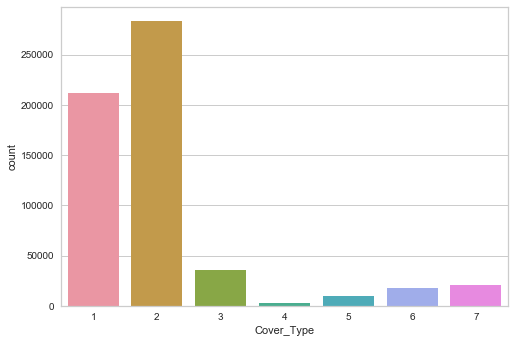

In [106]:
sns.countplot(df_normalized_w_target['Cover_Type'])

In [107]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

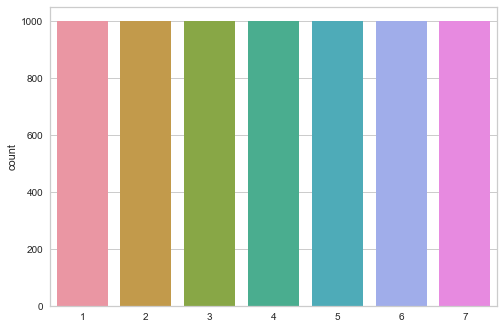

In [108]:
sns.countplot(y)

In [109]:
sp.stats.describe(X)

DescribeResult(nobs=7000, minmax=(array([0.00850425, 0.        , 0.        , 0.        , 0.06976744,
       0.        , 0.28740157, 0.38188976, 0.        , 0.00418235,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]), array([0.9989995 , 1.        , 0.77272727, 0.94488189, 0.75581395,
       0.97442743, 1.        , 1.        , 0.98818898, 0.96612296,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.     

### Split into Training and Testing

In [110]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [111]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3: 767, 5: 766, 7: 764, 6: 752, 1: 738, 4: 733, 2: 730})
Testing target statistics: Counter({2: 270, 4: 267, 1: 262, 6: 248, 7: 236, 5: 234, 3: 233})


### Feature Selection for Decision Trees

In [114]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.tree import DecisionTreeClassifier


In [115]:
clf = DecisionTreeClassifier(random_state=42)

In [116]:
clf = clf.fit(X_train, y_train)

In [121]:
#print("Features:",[list(df_normalized_w_target.columns)[7:-1]])
#print("Num of Features:", fit.n_features_)
#print("Selected Features:", fit.support_)
#print("Feature Ranking:", fit.ranking_)
from pprint import pprint
feature_names = list(df_normalized_w_target.columns)[7:-1]
pprint(dict(zip(feature_names, clf.feature_importances_)))


{'Hillshade_3pm': 0.025521688989605613,
 'Hillshade_9am': 0.06514089675037689,
 'Hillshade_Noon': 0.035283630154485136,
 'Horizontal_Distance_To_Fire_Points': 0.0736460062727714,
 'Horizontal_Distance_To_Roadways': 0.07842210976459574,
 'Soil_Type_1': 0.0017563059773879188,
 'Soil_Type_10': 0.00783927520246036,
 'Soil_Type_11': 0.001597458261351177,
 'Soil_Type_12': 0.008462841945307149,
 'Soil_Type_13': 0.0011290432522333888,
 'Soil_Type_14': 0.0,
 'Soil_Type_15': 0.0,
 'Soil_Type_16': 0.0015809504296398385,
 'Soil_Type_17': 0.00397098640892068,
 'Soil_Type_18': 0.0,
 'Soil_Type_19': 0.001109285869131416,
 'Soil_Type_2': 0.00345404852913302,
 'Soil_Type_20': 0.001231858964094942,
 'Soil_Type_21': 0.00020577506134001705,
 'Soil_Type_22': 0.0017375558054355735,
 'Soil_Type_23': 0.001554075858126616,
 'Soil_Type_24': 0.0005451296621758979,
 'Soil_Type_25': 0.0,
 'Soil_Type_26': 0.0,
 'Soil_Type_27': 0.0,
 'Soil_Type_28': 0.0,
 'Soil_Type_29': 0.0031803648547735915,
 'Soil_Type_3': 0.0151

In [122]:
#feature_list = pd.DataFrame(columns = (data.columns)[:-1])
feature_list = list(df_normalized_w_target.columns)[7:-1]
len(feature_list)

54

In [123]:
included_features = list(fit.support_)
len(included_features)

54

In [124]:
feature_ranking = list(fit.ranking_)
len(feature_ranking)

54

In [125]:
ft_df = {'Features': feature_list, "Included?": included_features, 'Ranking':feature_ranking }
list_of_log_features = pd.DataFrame(ft_df)
list_of_log_features.sort_values(by='Ranking')

Features  Included?  Ranking
52                        Soil_Type_39       True        1
25                        Soil_Type_12       True        1
23                        Soil_Type_10       True        1
53                        Soil_Type_40      False        2
35                        Soil_Type_22      False        3
24                        Soil_Type_11      False        4
51                        Soil_Type_38      False        5
17                         Soil_Type_4      False        6
39                        Soil_Type_26      False        7
13                   Wilderness_Area_4      False        8
48                        Soil_Type_35      False        9
26                        Soil_Type_13      False       10
11                   Wilderness_Area_2      False       11
41                        Soil_Type_28      False       12
31                        Soil_Type_18      False       13
22                         Soil_Type_9      False       14
34                        Soil_Type_21      False       15
30                        Soil_Type_17      False       16
47                        Soil_Type_34      False       17
37                        Soil_Type_24      False       18
19                         Soil_Type_6      False       19
16                         Soil_Type_3      False       20
15                         Soil_Type_2      False       21
36                        Soil_Type_23      False       22
38                        Soil_Type_25      False       23
32                        Soil_Type_19      False       24
43                        Soil_Type_30      False       25
21                         Soil_Type_8      False       26
20                         Soil_Type_7      False       27
33                        Soil_Type_20      False       28
42                        Soil_Type_29      False       29
29                        Soil_Type_16      False       30
10                   Wilderness_Area_1      False       31
7                       Hillshade_Noon      False       32
8                        Hillshade_3pm      False       33
6                        Hillshade_9am      False       34
12                   Wilderness_Area_3      False       35
45                        Soil_Type_32      False       36
46                        Soil_Type_33      False       37
2                                slope      False       38
0                            elevation      False       39
44                        Soil_Type_31      False       40
3     horizontal_distance_to_hydrology      False       41
4       vertical_distance_to_hydrology      False       42
1                               aspect      False       43
9   Horizontal_Distance_To_Fire_Points      False       44
5      Horizontal_Distance_To_Roadways      False       45
40                        Soil_Type_27      False       46
49                        Soil_Type_36      False       47
50                        Soil_Type_37      False       48
18                         Soil_Type_5      False       49
28                        Soil_Type_15      False       50
14                         Soil_Type_1      False       51
27                        Soil_Type_14      False       52

## DECISION TREES

In [126]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## MODEL PERFORMANCE

In [128]:
predictions = dtree.predict(X_test)

In [127]:
from sklearn import metrics
#this is for all the variables
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7354285714285714


In [129]:
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.74


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.60      0.61      0.60       262
           2       0.54      0.52      0.53       270
           3       0.68      0.68      0.68       233
           4       0.91      0.93      0.92       267
           5       0.77      0.82      0.79       234
           6       0.74      0.74      0.74       248
           7       0.91      0.88      0.89       236

    accuracy                           0.74      1750
   macro avg       0.74      0.74      0.74      1750
weighted avg       0.73      0.74      0.73      1750



In [133]:
print(confusion_matrix(y_test,predictions))

[[159  77   0   0   6   1  19]
 [ 70 141  11   1  38   8   1]
 [  0   8 158  19   4  44   0]
 [  0   2  11 247   0   7   0]
 [  9  23   8   0 191   3   0]
 [  1   7  43   5   8 184   0]
 [ 26   3   0   0   0   0 207]]


### - Using Decision Tree Classifiers and including all 54 variables, we get an accuracy rate of about 74%.

In [155]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

features = list(feature_list)
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

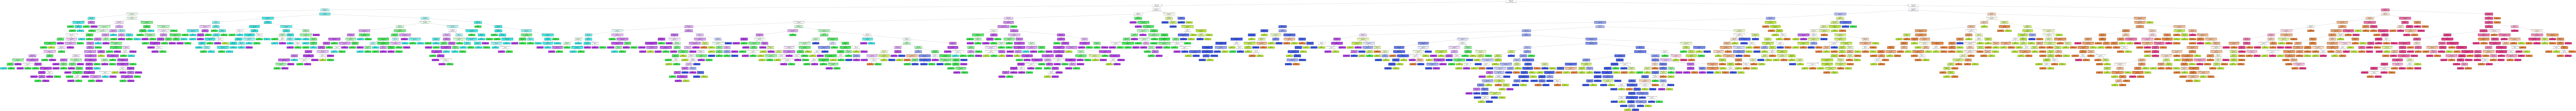

In [157]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
#export_graphviz(dtree,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png()) 

# Create DOT data
#dot_data = tree.export_graphviz(clf, out_file=None, 
                                #feature_names=features,  
                                #class_names=np.unique(y))
# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())
#export_graphviz(dtree, out_file=dot_data,  
               # filled=True, rounded=True,
                #special_characters=True)

#(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Sources: 
**Data Sources and Documentation:**
- https://archive.ics.uci.edu/ml/datasets/Covertype
- http://rexa.info/paper/d44ba72ee840ac929fb2b78f6d9f6c6b408ff1da


**Extraction:** 
- https://realpython.com/python-string-split-concatenate-join/
- https://stackoverflow.com/questions/28595701/pandas-equivalent-of-rs-cbind-concatenate-stack-vectors-vertically
- https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
- https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
- https://www.guru99.com/reading-and-writing-files-in-python.html
- https://stackoverflow.com/questions/31797013/how-to-open-a-data-file-extension

**Exploration**:
- https://www.datacamp.com/community/tutorials/categorical-data
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas/29763653
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://seaborn.pydata.org/tutorial/categorical.html
- Categorical Data https://www.datacamp.com/community/tutorials/categorical-data 
- https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
- https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
- https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://seaborn.pydata.org/generated/seaborn.clustermap.html
- https://stackoverflow.com/questions/42818670/pandas-dataframe-average-calculation
- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python




**General Syntax:**
- https://stackoverflow.com/questions/42202872/how-to-convert-list-to-row-dataframe-with-pandas
- https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
- https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column/42049158#42049158
- https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
- https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
- https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas 
- https://pbpython.com/categorical-encoding.html
- https://www.geeksforgeeks.org/python-random-sample-function/
- https://stackoverflow.com/questions/48841624/dataframe-object-has-no-attribute-ravel-when-transforming-target-variable

**Data Sampling:**
- https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
- https://github.com/dipanjanS/practical-machine-learning-with-python#contents


**Feature Selection:**
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
- https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
- PCA: 
    - https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
    - http://staskolenikov.net/talks/Gustavo-Stas-PCA-generic.pdf
    - https://www.researchgate.net/post/Should_I_use_PCA_with_categorical_data
    - https://stackoverflow.com/questions/40795141/pca-for-categorical-features
- Dimensionality Reduction: 
    - MCA: https://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb
    - https://pypi.org/project/mca/ 
    - https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
- https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63 
- https://www.kaggle.com/questions-and-answers/55494
- https://datascience.stackexchange.com/questions/36849/how-to-implement-feature-selection-for-categorical-variables-especially-with-ma

**Transformation:**
- Train test split: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
    - https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
    - http://scikit.ml/stratification.html

**Modeling:**
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://www.kdnuggets.com/2016/03/data-science-process.html
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- https://github.com/janeyin600/Data_analysis/blob/master/train_test_split.ipynb
- https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
- https://stats.stackexchange.com/questions/189760/two-ways-of-predicting-a-categorical-variable
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
- https://github.com/samirgadkari/Predict_Functional_Water_Pumps_Tanzania_Kaggle/blob/master/Predictive_Modeling_Kaggle_Challenge.ipynb
- https://towardsdatascience.com/dealing-with-categorical-data-fast-an-example-d4329b44253d
- Linear Regression: 
    - https://realpython.com/linear-regression-in-python/ 
    - https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
    - https://medium.com/coinmonks/multiple-regression-regression-part-2-aeffa1843073
- Softmax Regression: 
    - http://mccormickml.com/2014/06/13/deep-learning-tutorial-softmax-regression/
    - https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html
- Logistic Regression: 
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
    - https://stackoverflow.com/questions/36760000/python-how-to-use-multinomial-logistic-regression-using-sklearn
    - https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#example-plot-multilabel-py
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
    - https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py
- https://discuss.analyticsvidhya.com/t/getting-an-error-valueerror-bad-input-shape-1906-38-when-applying-logistics-regression-model/19025
- https://scikit-learn.org/stable/modules/linear_model.html
- https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8




**Loading:**

### Questions: 
- how do I use RFE??? AttributeError: 'DataFrame' object has no attribute 'data'
- deep dive into explaining/understanding a correlation matrix
- Multiclass logistic regression: does this really only apply to 1 vs all? 